In [47]:
import numpy as np
from My_NN.nn import Layer_Dense
from My_NN.activation import ReLU, Softmax
from My_NN.nn import Loss_CategoricalCrossentropy
import matplotlib.pyplot as plt

In [4]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0, xw1, xw2, b)

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print(z)

# ReLU activation function
y = max(z, 0)
print(y)


-3.0 2.0 6.0 1.0
6.0
6.0


In [5]:
# Backward pass
# The derivative from the next layer
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)
# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0


In [ ]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db

[-3.0, -1.0, 2.0] [1.0, -2.0, 3.0]


In [9]:
print(w,b)

[-3.0, -1.0, 2.0] 1.0


In [10]:
alpha=-0.001
w[0]+=(alpha*dw[0])
w[1]+=(alpha*dw[1])
w[2]+=(alpha*dw[2])
b=(alpha*db)

In [11]:
print(w,b)

[-3.001, -0.998, 1.997] -0.001


In [13]:
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
# Adding
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)
print(y)


4.985


In [38]:
def relu(x):
  return np.where(x>0,x,0)
def relu_derivative(x):
  return np.where(x>0,1,0)
w = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001
#forwad pass
linear_output = np.dot(weights, inputs) + bias
output = relu(linear_output)
print(output)
loss = (output - target_output) ** 2
print(loss)
linear_output

6.0
36.0


6.0

In [39]:
#prev wt
print(w)
#finding wt derivative
dloss_dw=(2*(loss)) * (relu_derivative(linear_output))  * (linear_output/w)
print(dloss_dw)
#updating wt
alpha=0.001
w=w-alpha*dloss_dw
print(w)

[-3. -1.  2.]
[-144. -432.  216.]
[-2.856 -0.568  1.784]


In [ ]:
#prev bias
print(bias)
#finding bias derivative
dloss_dbias=(2*(loss)) * (relu_derivative(linear_output))  * (linear_output/bias)
print(dloss_dbias)
#updating wt
alpha=0.001
bias=bias-alpha*dloss_dbias
print(bias)

1.0
432.0
0.5680000000000001


In [41]:
#again forwad pass and loss
linear_output = np.dot(weights, inputs) + bias
output = relu(linear_output)
print(output)
loss = (output - target_output) ** 2
print(loss)

5.568
31.002623999999997


In [80]:
loss_list=[]
def relu(x):
  return np.where(x>0,x,0)
def relu_derivative(x):
  return np.where(x>0,1,0)
w = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001

In [ ]:
for i in range(100):
  #forwad
  linear_output = np.dot(w, inputs) + bias
  output = relu(linear_output)
  loss = (output - target_output) ** 2
  loss_list.append(loss)
  print("iteration= ",i," Loss = ",loss)
  
  #finding wt derivative
  dloss_dw=(2*(output - target_output)) * (relu_derivative(linear_output))  * (linear_output/w)
  #updating wt
  w=w-alpha*dloss_dw
  
  #finding bias derivative
  d_bias=1
  dloss_dbias=(2*(loss)) * (relu_derivative(linear_output))  * (d_bias)
  #updating wt
  bias=bias-alpha*dloss_dbias

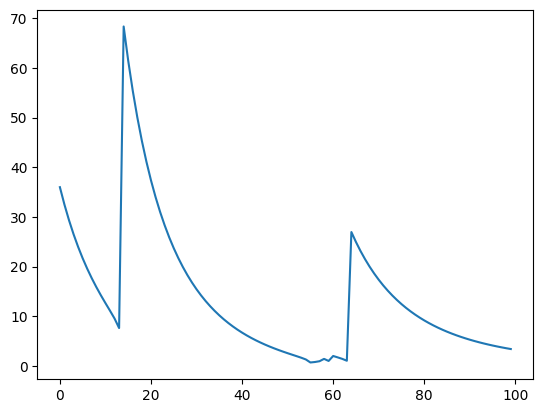

In [82]:
plt.plot(loss_list)
plt.show()